# Explore results after scraping results website

### User variables


In [1]:
Date = '2020-02' # yyyy-mm
toggle_to_opbod = False

### Modules and functions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,Image

### Load results

Load auction results and data from rdw.

In [3]:
if toggle_to_opbod:
    file_name = '../../../python-nb/data/drz-data-opbod-{}.pkl'.format(Date)
else:
    file_name = '../data/drz-data-{}.pkl'.format(Date)
print(file_name)
drz = pd.read_pickle(file_name)

if toggle_to_opbod:
    file_name = '../../../python-nb/data/rdw-data-opbod-{}.pkl'.format(Date)
else:
    file_name = '../data/rdw-data-{}.pkl'.format(Date)
print(file_name)
rdw = pd.read_pickle(file_name)

# rdw column names
#   NOTE: format changed in April 2019: RDW info is appended to auction results as extra columns in dataframe
if pd.to_datetime(Date, format='%Y-%m') >= pd.to_datetime('2019-04', format='%Y-%m'):
    rdwinfo = [c for c in rdw.columns if c.startswith('rdw_')]

# fix odometer
if pd.to_datetime(Date, format='%Y-%m') == pd.to_datetime('2019-09', format='%Y-%m'):
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch') | (rdw.OdoKM == 'volgens nap onlogisch')
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    
    idx = '2019-9-9106'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'logisch'
    rdw.loc[idx,'NAP'] = 'logisch'
    drz.loc[idx,'OdoKM'] = '251.571'
    rdw.loc[idx,'OdoKM'] = '251.571'
    
    display(drz.loc[[idx],['Title', 'OdoKM', 'NAP']])
    display(rdw.loc[[idx],['Title', 'OdoKM', 'NAP']])

    idx = '2019-9-9258'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    idx = '2019-9-9249'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    
    display(rdw.loc[sel, ['Title', 'OdoKM', 'NAP']])
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch')
    assert all(~sel)



../data/drz-data-2020-02.pkl
../data/rdw-data-2020-02.pkl


# Cheap cars with valid inspection

In [4]:
is_cheap = (
    drz.LotType == "Personenauto"
) & (
    drz.Price<3000
) & (
    drz.Price>0
) & ~(
    (
        drz.APKdate.isnull()
    ) | (
        drz.APKdate.apply(lambda x:x == '')
    )
)

drz.loc[is_cheap,
        ["Price","ItemType","ItemBrand","Mfdate","APKdate","OdoKM"]].sort_values(by='OdoKM')

,Price,ItemType,ItemBrand,Mfdate,APKdate,OdoKM
2020-2-8126,1889.0,picanto,KIA,16.02.2010,18.02.2020,101.186
2020-2-8129,1357.0,fiat panda,FIAT,09.04.2009,24.04.2020,104.305
2020-2-8102,747.0,nissan almera; 1.5 5hb,NISSAN,29.09.2005,22.03.2020,129.370
2020-2-8158,2011.0,nissan pixo,NISSAN,09.04.2010,03.06.2020,130.076
2020-2-8165,747.0,combo-c-van z13dtj-dpf/2000 ac,OPEL,24.09.2009,22.03.2020,164.547
2020-2-8131,2561.0,ibiza,SEAT,04.08.2010,01.04.2020,174.020
2020-2-8161,1717.0,fox,VOLKSWAGEN,11.07.2007,11.07.2020,175.289
2020-2-8105,1263.0,polo; 55 kw,VOLKSWAGEN,31.03.2003,06.07.2020,189.281
2020-2-8206,349.0,daewoo tacuma; 1.6 4drs (77kw),DAEWOO,06.11.2002,21.06.2020,194.329
2020-2-8201,400.0,daewoo tacuma; 2.0 4drs aut (8,DAEWOO,09.05.2003,10.04.2020,203.722


In [5]:
if pd.to_datetime(Date, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,["rdwinfo"]])
else:
    display(rdw.loc[is_cheap,rdwinfo])

,rdw_kenteken,rdw_Reg,rdw_voertuigsoort,rdw_merk,rdw_handelsbenaming,rdw_vervaldatum_apk,rdw_datum_tenaamstelling,rdw_inrichting,rdw_eerste_kleur,rdw_tweede_kleur,...,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_16,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_17,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_18,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_19,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_1,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_2,rdw_versnellingsbak_uitvoering_type_versnellingsbak_1,rdw_versnellingsbak_uitvoering_aantal_versnellingen_ondergrens_1,rdw_versnellingsbak_uitvoering_aantal_versnellingen_bovengrens_1,rdw_TimeStamp_y
2020-2-2219,31SXX9,31-SXX-9,Personenauto,SEAT,IBIZA,20200826.0,20191104.0,MPV,GRIJS,Niet geregistreerd,...,C,C,C,C,NaN,NaN,H,5.0,5.0,20200207
2020-2-8102,30RXFX,30-RX-FX,Personenauto,NISSAN,NISSAN ALMERA,20200322.0,20191125.0,hatchback,GRIJS,Niet geregistreerd,...,G,G,G,NaN,NaN,NaN,H,5.0,5.0,20200207
2020-2-8105,35GTB2,35-GTB-2,Personenauto,VOLKSWAGEN,POLO,20200706.0,20191111.0,hatchback,GRIJS,Niet geregistreerd,...,G,G,G,NaN,NaN,C,H,5.0,5.0,20200207
2020-2-8106,89PLT6,89-PLT-6,Personenauto,VOLKSWAGEN,POLO,20200421.0,20191202.0,hatchback,WIT,Niet geregistreerd,...,C,C,C,C,NaN,NaN,H,5.0,5.0,20200207
2020-2-8123,19NXZ2,19-NXZ-2,Personenauto,VOLKSWAGEN,POLO,20200322.0,20200106.0,hatchback,ZWART,Niet geregistreerd,...,C,C,C,C,NaN,NaN,H,5.0,5.0,20200207
2020-2-8126,49KTH4,49-KTH-4,Personenauto,KIA,PICANTO,20200218.0,20200116.0,MPV,ZWART,Niet geregistreerd,...,D,D,E,NaN,NaN,NaN,H,5.0,5.0,20200207
2020-2-8127,02RJTG,02-RJ-TG,Personenauto,OPEL,VECTRA-C,20200304.0,20200116.0,sedan,GRIJS,Niet geregistreerd,...,F,F,G,NaN,NaN,NaN,H,5.0,5.0,20200207
2020-2-8129,19LHV8,19-LHV-8,Personenauto,FIAT,FIAT PANDA,20200424.0,20200116.0,MPV,WIT,Niet geregistreerd,...,F,F,F,NaN,NaN,NaN,H,5.0,5.0,20200207
2020-2-8131,54NBF5,54-NBF-5,Personenauto,SEAT,IBIZA,20200401.0,20191211.0,MPV,WIT,Niet geregistreerd,...,C,C,C,NaN,NaN,NaN,H,5.0,5.0,20200207
2020-2-8136,83SFFD,83-SF-FD,Personenauto,MERCEDES-BENZ,B 200 CDI,20201113.0,20200114.0,stationwagen,ZWART,Niet geregistreerd,...,G,G,G,NaN,NaN,NaN,H,6.0,6.0,20200207


In [6]:
if pd.to_datetime(Date, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,"rdwinfo"][0])
else:
    display(rdw.loc[is_cheap,rdwinfo].iloc[0,:])

rdw_kenteken                                                               31SXX9
rdw_Reg                                                                  31-SXX-9
rdw_voertuigsoort                                                    Personenauto
rdw_merk                                                                     SEAT
rdw_handelsbenaming                                                         IBIZA
                                                                         ...     
rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_2             NaN
rdw_versnellingsbak_uitvoering_type_versnellingsbak_1                           H
rdw_versnellingsbak_uitvoering_aantal_versnellingen_ondergrens_1                5
rdw_versnellingsbak_uitvoering_aantal_versnellingen_bovengrens_1                5
rdw_TimeStamp_y                                                          20200207
Name: 2020-2-2219, Length: 504, dtype: object

# Pictures of lots

In [7]:
# ix=drz.N_images.idxmax()
ix=drz.Price.idxmax(); print('Price: EUR {:g}\n\n'.format(drz.loc[ix,'Price']))
# Mfdate = drz.Mfdate.apply(lambda x: pd.to_datetime(x,format='%d.%m.%Y') if len(x)==10 else pd.np.NaN)
# ix=Mfdate.idxmin(); print('year of mf: {:s}\n\n'.format(drz.loc[ix,'Mfdate']))
# ix = '2019-2-2005' # largest km/day
# ix = '2019-2-7345' # largest km

print(ix)
for u in drz.loc[ix,'Images']:
    print(u)
    print(drz.loc[ix,'Source'])
    display(Image(url=u,width=400))
    

Price: EUR 46000


2020-2-2403
http://www.domeinenrz.nl/ufc/static/1580208368/thumb/domeinenrz_sites/b450ddf602b09dc5ee98daa7fd74f7e9/1024/768/image.jpg
http://www.domeinenrz.nl/catalogi/verkoop_bij_inschrijving_2020-0002?=&veilingen=2020-0002&meerfotos=K2000022403


http://www.domeinenrz.nl/ufc/static/1580208341/thumb/domeinenrz_sites/10f18bfa530dfc0291e7cf3299377f63/1024/768/image.jpg
http://www.domeinenrz.nl/catalogi/verkoop_bij_inschrijving_2020-0002?=&veilingen=2020-0002&meerfotos=K2000022403


http://www.domeinenrz.nl/ufc/static/1580208342/thumb/domeinenrz_sites/1888728dc4478cf896c94e5a150d5a79/1024/768/image.jpg
http://www.domeinenrz.nl/catalogi/verkoop_bij_inschrijving_2020-0002?=&veilingen=2020-0002&meerfotos=K2000022403


# Usage

How many km are driven per year or day?

### Odometer conversion

In [8]:
def odo_str2float(df):
    '''
    Convert odometer to numerical values.
    Also convert Miles to KMs.
    '''
    
    ml2km = 1.609344
    
    # substitute to nan
    df.OdoKM = df.OdoKM.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    df.OdoMLS = df.OdoMLS.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    # float
    df["OdoKM_num"] = df.OdoKM.apply(lambda x:x.replace('.','')).astype(float)
    df["OdoMLS_num"] = df.OdoMLS.apply(lambda x:x.replace('.','')).astype(float)
    # convert miles to km
    df["Odo"] = df.OdoKM_num.copy()
    chooseMls = (df.OdoKM_num.isna()) & ~(df.OdoMLS_num.isna())
    df.loc[chooseMls,"Odo"] = df.loc[chooseMls,"OdoMLS_num"].apply(float) * ml2km

In [9]:
odo_str2float(drz)

drz[['Odo','OdoKM','OdoKM_num','OdoMLS','OdoMLS_num']]

,Odo,OdoKM,OdoKM_num,OdoMLS,OdoMLS_num
2020-2-1801,29347.0,29.347,29347.0,nan,NaN
2020-2-1802,26252.0,26.252,26252.0,nan,NaN
2020-2-1803,26822.0,26.822,26822.0,nan,NaN
2020-2-1804,58875.0,58.875,58875.0,nan,NaN
2020-2-1805,46022.0,46.022,46022.0,nan,NaN
...,...,...,...,...,...
2020-2-8239,NaN,nan,NaN,nan,NaN
2020-2-8240,NaN,nan,NaN,nan,NaN
2020-2-9600,NaN,nan,NaN,nan,NaN
2020-2-9601,NaN,nan,NaN,nan,NaN


### Dates

In [10]:
AuctDate = pd.to_datetime(drz.index[0][0:-5], format = '%Y-%m')

# serial date
drz["Mfdate_ser"] = drz.Mfdate.apply(lambda x:pd.to_datetime(x, format = '%d.%m.%Y') if (x!='') & ('-' not in x) else pd.np.NaN)

# age
drz["Age"] = (AuctDate - drz.Mfdate_ser)
drz["Age_year"] = drz.Age.apply(lambda x:x.days/365.25)

- - - -
# Continue with cars only

In [11]:
out = drz.Price.copy()
Features = drz.loc[:,["ItemBrand","ItemType","Odo","Age_year"]].copy()

In [12]:
# Drop rows
Subsel = drz.LotType == 'Personenauto'
dropIx=drz[~Subsel].index
out.drop(index=dropIx,inplace=True)
Features.drop(index=dropIx,inplace=True)

### one hot encoding brand and model

In [13]:
Dummies = pd.get_dummies(Features.ItemBrand,prefix='Brand_',drop_first=False)
Features = pd.concat([Features,Dummies],axis=1)

Features.describe()

,Odo,Age_year,Brand__ALFA ROMEO,Brand__ASTON-MARTIN,Brand__AUDI,Brand__BMW,Brand__CITROËN,Brand__DAEWOO,Brand__FERRARI,Brand__FIAT,...,Brand__OPEL,Brand__PEUGEOT,Brand__PORSCHE,Brand__RENAULT,Brand__SEAT,Brand__SMART,Brand__SSANGYONG,Brand__TOYOTA,Brand__VOLKSWAGEN,Brand__VOLVO
count,125.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,204055.816493,11.097634,0.007752,0.007752,0.085271,0.100775,0.023256,0.015504,0.007752,0.015504,...,0.054264,0.038760,0.015504,0.046512,0.054264,0.007752,0.007752,0.023256,0.193798,0.077519
std,111437.560511,5.686459,0.088045,0.088045,0.280374,0.302204,0.151302,0.124027,0.088045,0.124027,...,0.227420,0.193774,0.124027,0.211411,0.227420,0.088045,0.088045,0.151302,0.396814,0.268456
min,325.000000,1.437372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115238.000000,7.441478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,204135.000000,10.332649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,287577.000000,14.340862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,463604.000000,44.925394,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plotting

In [14]:
def ecdf(data):
    x = sorted(data)
    y = pd.np.arange(0,len(x))/len(x)
    return x,y

# # example
# x,y = ecdf(km_p_day)
# plt.plot(x,y)

In [15]:
# km per day
km_p_day = Features.Odo/(Features.Age_year*365.25).fillna(0)
sel = ~(km_p_day.isna() | (km_p_day == pd.np.inf))
km_p_day = km_p_day.loc[sel]

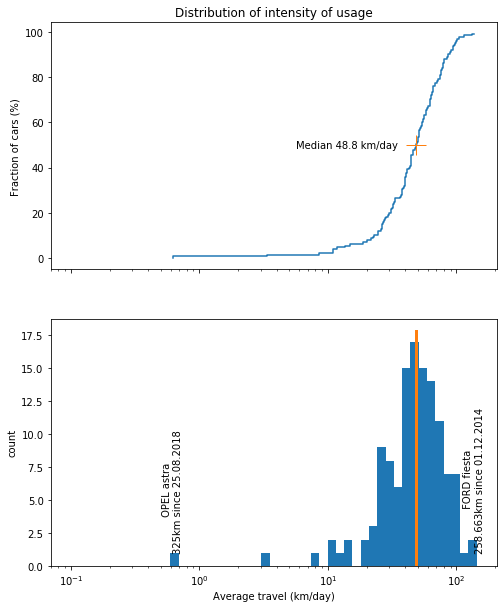

In [16]:
# Plot ecdf and hist
x,y = ecdf(km_p_day)
fig,axs = plt.subplots(ncols=1,nrows=2, figsize=[8,10],sharex=True)

# ecdf
ax = axs[0]
ax.step(x,y*100)
ax.plot(pd.np.median(x),50,'+',markersize=20)
ax.text(pd.np.median(x),50,'Median {:.1f} km/day      '.format(pd.np.median(x)),ha='right',va='center');
ax.set_title('Distribution of intensity of usage')
ax.set_ylabel('Fraction of cars (%)')

xl = axs[0].get_xlim()

# hist
ax = axs[1]
ax.hist(x,bins=pd.np.logspace(-1,pd.np.log10(xl[1]),50))
yl = axs[1].get_ylim()
ax.plot(pd.np.array([1,1])*pd.np.median(x),yl,'-',linewidth=3)
ax.set_xlabel('Average travel (km/day)')
ax.set_ylabel('count')

ax.text(
    km_p_day.min(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmin(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.text(
    km_p_day.max(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmax(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.set_xscale('log')


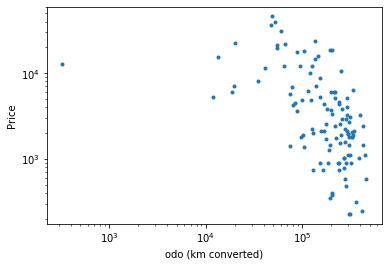

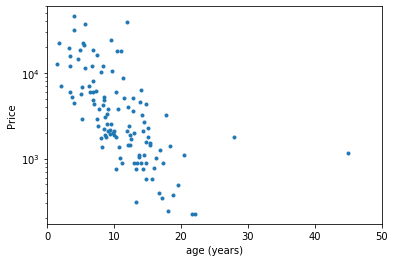

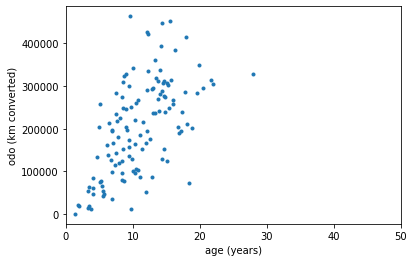

In [17]:
plt.plot(Features.Odo,out,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('odo (km converted)')
plt.ylabel('Price')

plt.figure()
plt.plot(Features.Age_year,out,'.')
plt.yscale('log')
plt.xlabel('age (years)')
plt.ylabel('Price')
plt.xlim(0,50)


plt.figure()
plt.plot(Features.Age_year,Features.Odo,'.')
plt.xlabel('age (years)')
plt.ylabel('odo (km converted)')
plt.xlim(0,50)

plt.show()



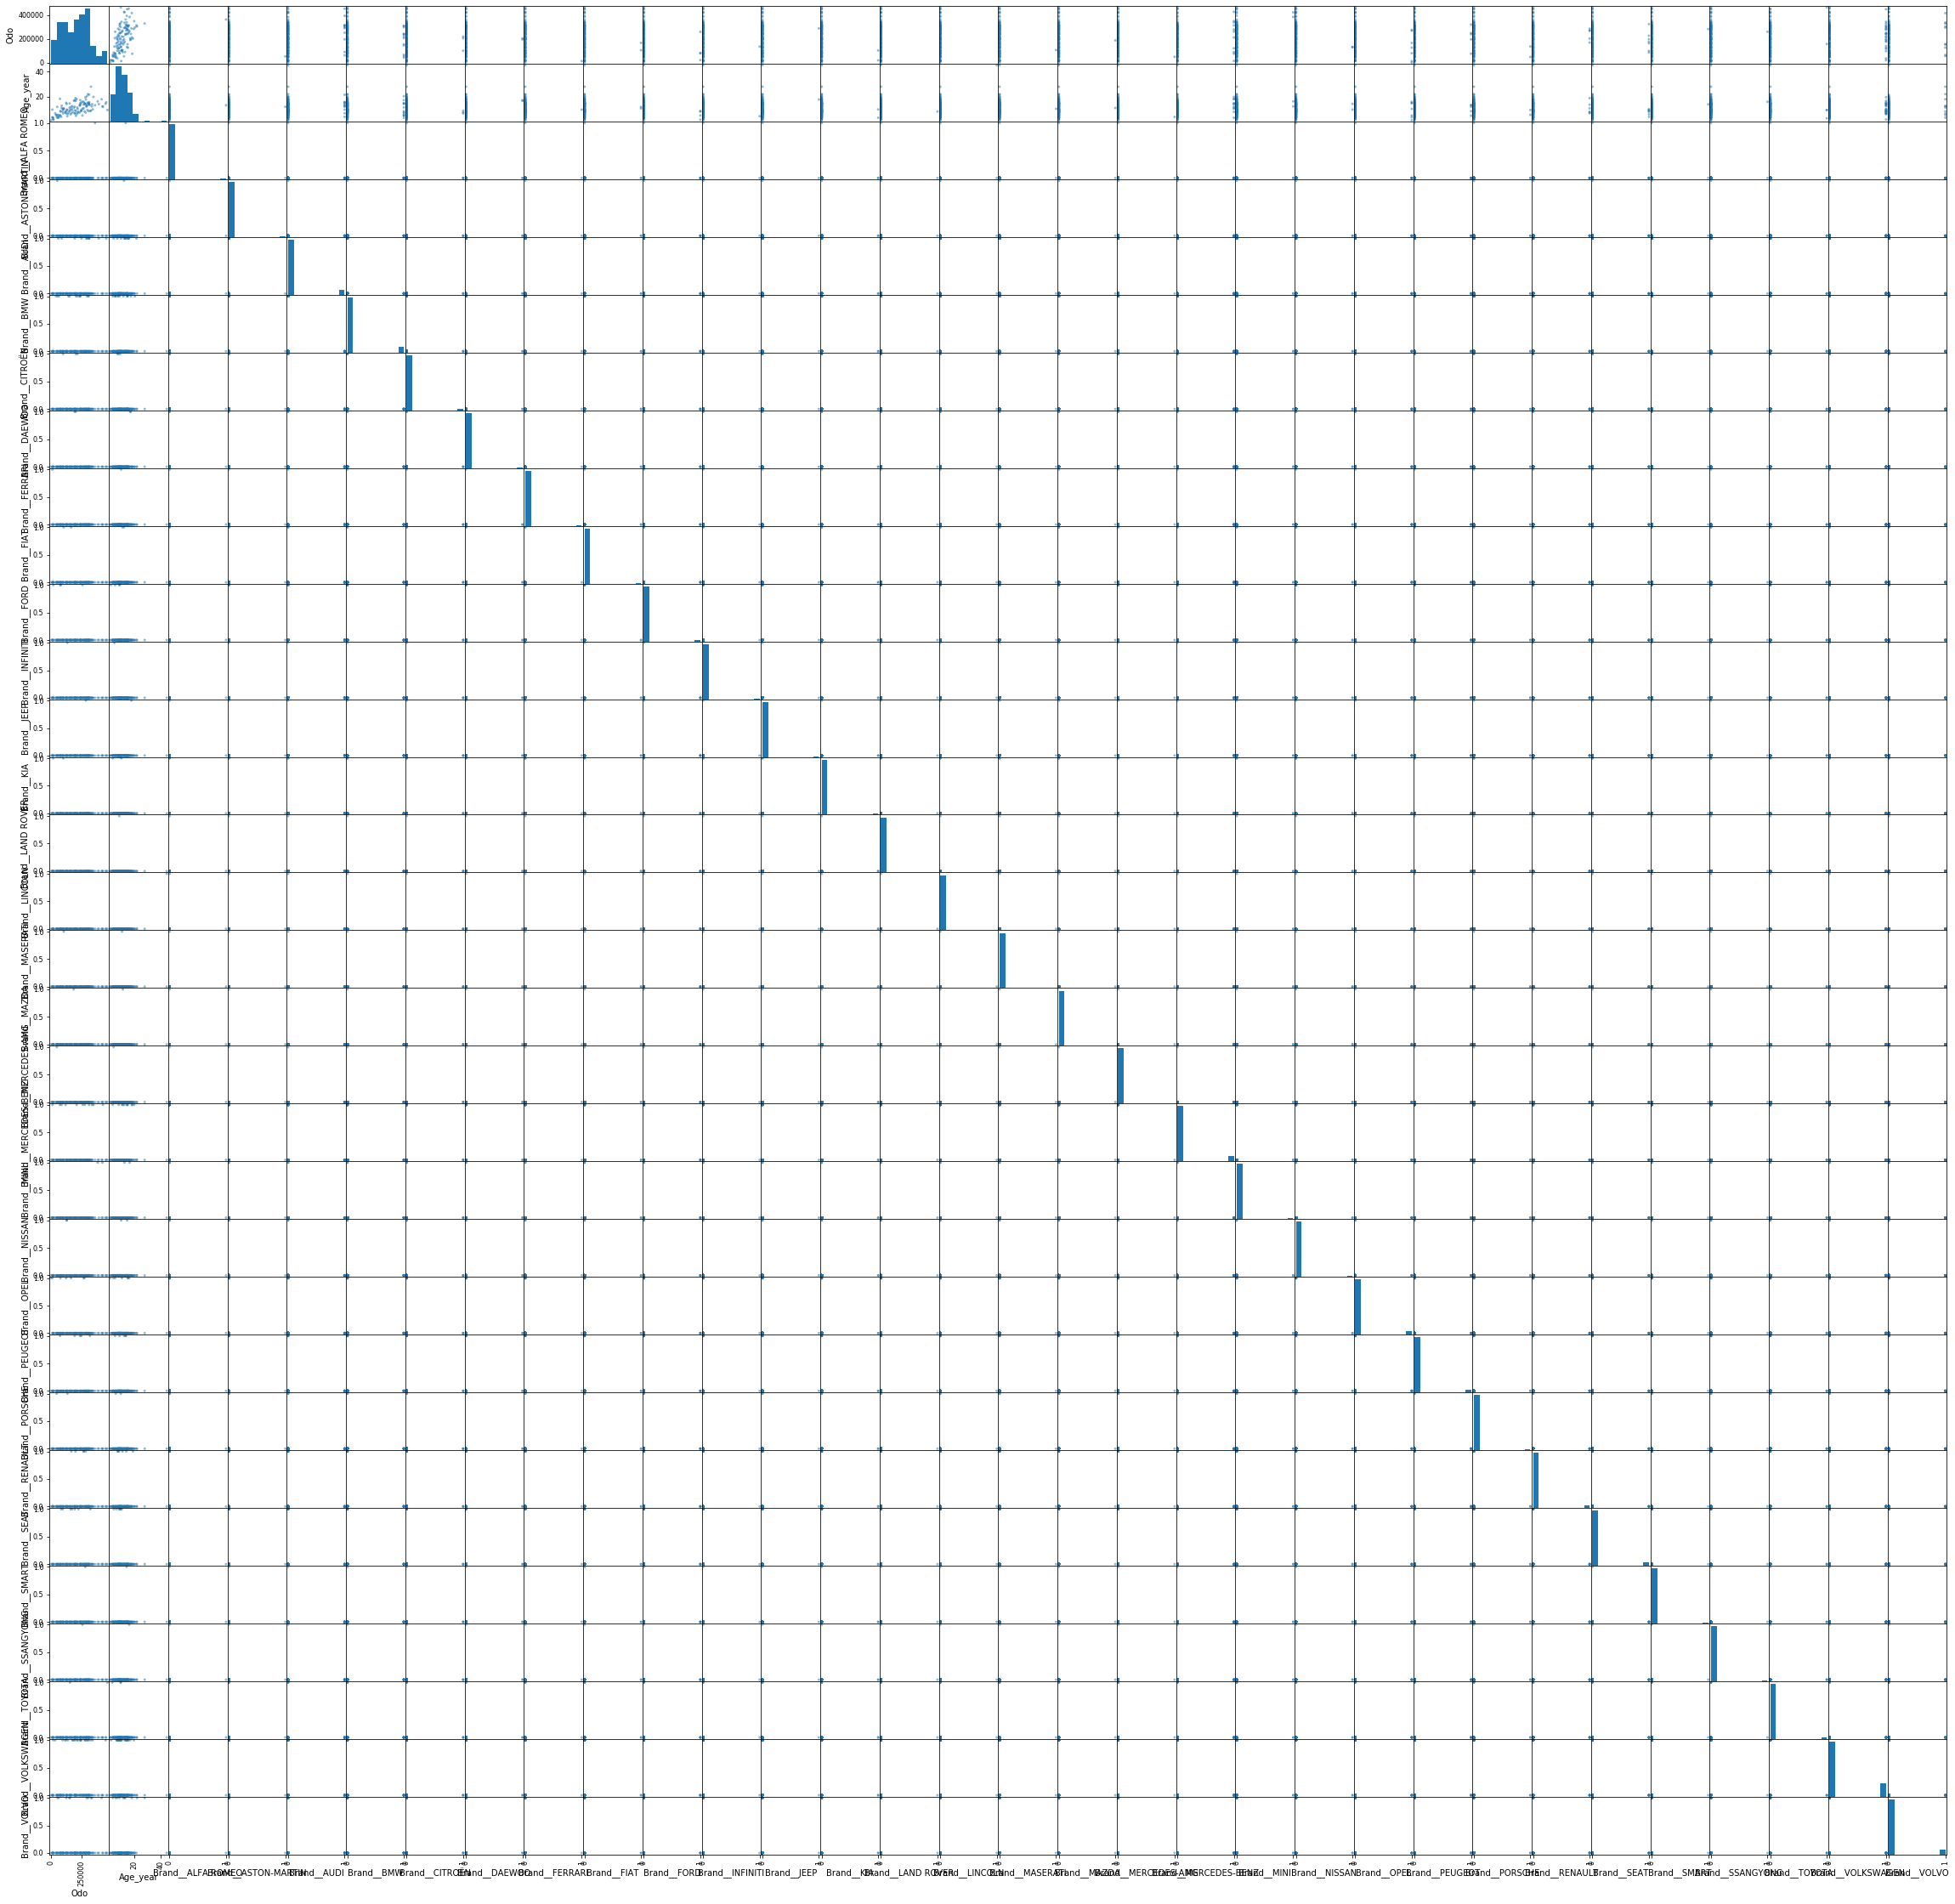

In [18]:
pd.plotting.scatter_matrix(Features,figsize=[40,40])
plt.show()

226.0

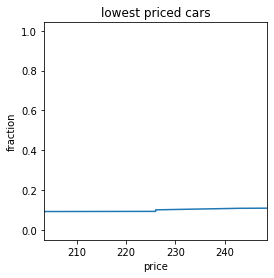

In [19]:
# price
x,y = ecdf(out)
plt.figure(figsize=[4,4])
plt.plot(x,y)
plt.xlim(left=out[out > 0].min()*.9, right=out[out > 0].min()*1.1)
plt.xlabel('price')
plt.ylabel('fraction')
plt.title('lowest priced cars')
# lowest price is 174?
out[out > 0].min()